In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display
import seaborn as sns
import pandas as pd

# Load Dataset

In [3]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Extracting Features and Labels and Transform them to Tensors

In [5]:
X = torch.tensor(iris.iloc[:,:-1].values, dtype = torch.float32)

In [6]:
X

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [7]:
y = torch.zeros(len(X), dtype = torch.long)
y[iris.species == 'setosa'] = 0
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

In [8]:
X.shape

torch.Size([150, 4])

In [9]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Creating Neural Network

In [19]:
# model = nn.Sequential(
#           nn.Linear(4,32),
#           nn.ReLU(),
#           nn.Linear(32,32),
#           nn.ReLU(),
#           nn.Linear(32,3),
#           )

In [20]:
class NN_Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(4,32)
    self.fc = nn.Linear(32,32)

    # Classification OR  output layer

    self.output = nn.Linear(32,3)

  # Forward pass

  def forward(self,x):

    # Pass the data through the input layer

    x = self.input(x)
    x = self.fc(x)

    # Apply ReLU activation

    x = F.relu(x)

    # output layer

    x = self.output(x)
    X = torch.sigmoid # This is not necessary because we are using cross entropy loss which already contains sigmoid.
    return x

# Create the instance of the model

In [21]:
model = NN_Classifier()

# Training The Model

In [22]:
learningRate = 0.01
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

epochs = 3501
losses = torch.zeros(epochs) # setting place holder for for loop.
for epoch in range(epochs):

    ypred = model(X)
    loss = lossfunc(ypred, y)
    losses[epoch] = loss.detach()

    if (epoch % 200) == 0:

        print(f' epochs : {epoch}  loss : {loss : 2.2f}')

    # Backpropagation

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


accuracy = 100 * torch.mean((torch.argmax(ypred, axis = 1) == y).float())


 epochs : 0  loss :  1.08
 epochs : 200  loss :  0.41
 epochs : 400  loss :  0.24
 epochs : 600  loss :  0.15
 epochs : 800  loss :  0.12
 epochs : 1000  loss :  0.10
 epochs : 1200  loss :  0.09
 epochs : 1400  loss :  0.08
 epochs : 1600  loss :  0.08
 epochs : 1800  loss :  0.08
 epochs : 2000  loss :  0.07
 epochs : 2200  loss :  0.07
 epochs : 2400  loss :  0.07
 epochs : 2600  loss :  0.07
 epochs : 2800  loss :  0.07
 epochs : 3000  loss :  0.06
 epochs : 3200  loss :  0.06
 epochs : 3400  loss :  0.06


In [23]:
accuracy

tensor(98.)

# Visualizing Loss Vs Epochs

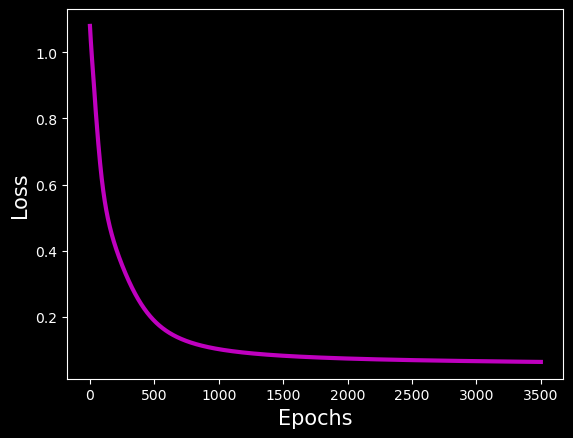

In [24]:
plt.plot(losses,'m', lw =3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.show()

# Understanding Calculation of Accuracy

In [25]:
accuracy = 100 * torch.mean((torch.argmax(ypred, axis = 1) == y).float())

In [26]:
ypred  # Score of model Corresponding to the probability

tensor([[ 16.1229,   8.5059, -23.7240],
        [ 14.4176,   7.9041, -21.5402],
        [ 14.8559,   7.8692, -21.8882],
        [ 13.6953,   7.5376, -20.4757],
        [ 16.1530,   8.4669, -23.6894],
        [ 16.1088,   8.6537, -23.8895],
        [ 14.4949,   7.6766, -21.3468],
        [ 15.3212,   8.2340, -22.7118],
        [ 13.1001,   7.2243, -19.5938],
        [ 14.6560,   8.0429, -21.9023],
        [ 16.9331,   8.9400, -24.9362],
        [ 14.5537,   7.9198, -21.6686],
        [ 14.5292,   7.9215, -21.6543],
        [ 14.4641,   7.5548, -21.1429],
        [ 19.4681,   9.9450, -28.2274],
        [ 18.6511,   9.5794, -27.1195],
        [ 17.4271,   8.9919, -25.3878],
        [ 15.8100,   8.3582, -23.2912],
        [ 16.8162,   9.0885, -25.0120],
        [ 16.2238,   8.5117, -23.8107],
        [ 15.4663,   8.5841, -23.2375],
        [ 15.6570,   8.2867, -23.0753],
        [ 16.5377,   8.3545, -23.8150],
        [ 13.3311,   7.7283, -20.2918],
        [ 13.4009,   7.7105, -20.3640],


In [27]:
torch.argmax(ypred, axis =1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [28]:
(torch.argmax(ypred, axis =1)==y)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [29]:
(torch.argmax(ypred, axis =1)==y).float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])

In [30]:
torch.mean((torch.argmax(ypred, axis =1)==y).float())

tensor(0.9800)

In [31]:
100 * torch.mean((torch.argmax(ypred, axis =1)==y).float())

tensor(98.)